<a href="https://colab.research.google.com/github/rajsingh018/Multilayer_Perceptron/blob/main/banknote_MLP/banknote_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron

In [9]:
dataset=pd.read_csv('banknote.csv')

In [10]:
dataset.head()

,ID,variance,skewness,curtosis,entropy,classes
0,ID_1347,1.25720,4.8731,-5.2861,-5.8741,1
1,ID_798,0.81583,4.8400,-5.2613,-6.0823,1
2,ID_981,0.63655,5.2022,-5.2159,-6.1211,1
3,ID_1164,0.68180,4.8504,-5.2133,-6.1043,1
4,ID_1225,0.26877,4.9870,-5.1508,-6.3913,1


In [11]:
dataset.tail()

,ID,variance,skewness,curtosis,entropy,classes
1367,ID_1065,-3.6961,-13.6779,17.5795,-2.6181,1
1368,ID_1370,-3.7503,-13.4586,17.5932,-2.7771,1
1369,ID_1126,-3.5985,-13.6593,17.6052,-2.4927,1
1370,ID_821,-4.0025,-13.4979,17.6772,-3.3202,1
1371,ID_943,-3.3793,-13.7731,17.9274,-2.0323,1


In [13]:
dataset.isnull().sum()

ID          0
variance    0
skewness    0
curtosis    0
entropy     0
classes     0
dtype: int64

In [14]:
dataset.describe()

,variance,skewness,curtosis,entropy,classes
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [15]:
X = dataset[dataset.columns[:-1]]

In [16]:
y = dataset['classes']

In [17]:
X.head()

,ID,variance,skewness,curtosis,entropy
0,ID_1347,1.25720,4.8731,-5.2861,-5.8741
1,ID_798,0.81583,4.8400,-5.2613,-6.0823
2,ID_981,0.63655,5.2022,-5.2159,-6.1211
3,ID_1164,0.68180,4.8504,-5.2133,-6.1043
4,ID_1225,0.26877,4.9870,-5.1508,-6.3913


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: classes, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='classes', ylabel='count'>

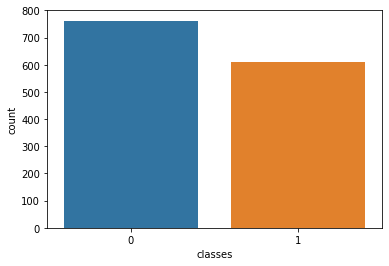

In [19]:
sns.countplot(dataset['classes'])

In [20]:
y.value_counts()

0    762
1    610
Name: classes, dtype: int64

In [21]:
Z = dataset['ID']

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
for i in dataset.columns:
  dataset[i]=le.fit_transform(dataset[i])

In [25]:
dataset.head()

,ID,variance,skewness,curtosis,entropy,classes
0,387,789,844,0,45,1
1,1148,721,840,1,40,1
2,1352,690,856,2,37,1
3,184,700,841,3,39,1
4,252,635,851,4,32,1


In [26]:
Z.head()

0    ID_1347
1     ID_798
2     ID_981
3    ID_1164
4    ID_1225
Name: ID, dtype: object

In [27]:
X=dataset.iloc[:,0:5]
y = dataset.iloc[:,5]

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
mlp=MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)


In [30]:
mlp.fit(X_train, y_train.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)

In [31]:
predictions=mlp.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm_ann = confusion_matrix(y_test, predictions)
cm_ann

array([[143,   6],
       [  6, 120]])

In [34]:
recall_ann = cm_ann[0][0]/(cm_ann[0][0] + cm_ann[0][1])
precision_ann = cm_ann[0][0]/(cm_ann[0][0]+cm_ann[1][1])
recall_ann,precision_ann

(0.959731543624161, 0.5437262357414449)

In [35]:
from sklearn.metrics import accuracy_score
predicted= mlp.predict(X_test)
accuracy_score(predicted,y_test)

0.9563636363636364

In [36]:
df_output=pd.DataFrame()

In [37]:
df_output['classes']=predictions

In [38]:
df_output['ID']=Z

In [39]:
df_output[['ID','classes']].to_csv(r'output.csv',index=False)

In [40]:
output=pd.read_csv('output.csv')
output.head()

,ID,classes
0,ID_1347,0
1,ID_798,1
2,ID_981,1
3,ID_1164,1
4,ID_1225,1


In [41]:
output.tail()

,ID,classes
270,ID_891,0
271,ID_486,0
272,ID_317,0
273,ID_1013,0
274,ID_1117,0
